In [ ]:
pip install --upgrade pandas

In [ ]:
pip install yfinance

In [ ]:
# import libraries
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm

[*********************100%***********************]  1 of 1 completed


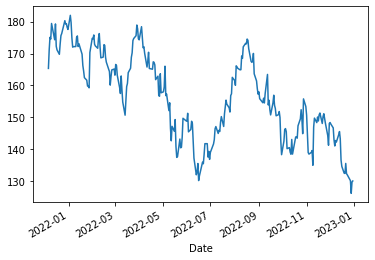

In [ ]:
# Big drop in Apple stock price
aapl = pd.DataFrame(yf.download('AAPL', start='2012-01-01', end='2023-01-01'))
aapl.loc['2021-12-06':'2023-01-02','Close'].plot()

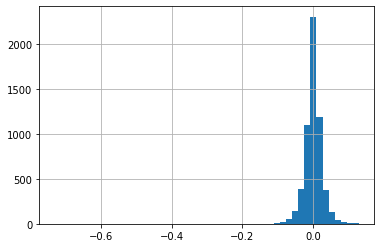

In [ ]:
# log daily returns
aapl['LogReturns'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
aapl['LogReturns'].hist(bins=50)

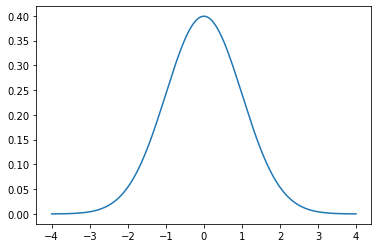

In [ ]:
#Probability Distribution Function
density = pd.DataFrame()
density['x'] = np.arange(-4,4,0.001)

density['pdf'] = norm.pdf(density['x'],0,1) #get pdf
plt.plot(density['x'], density['pdf'])

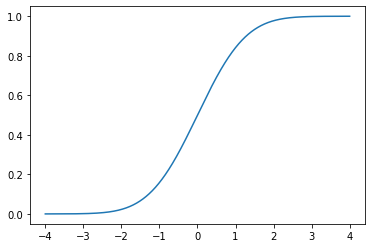

In [ ]:
# Cumulative Distribution Function
density['cdf'] = norm.cdf(density['x'],0,1)
plt.plot(density['x'], density['cdf'])

In [ ]:
# Approximate mean and variance of the log daily returns
mu = aapl['LogReturns'].mean()
sigma = aapl['LogReturns'].std(ddof=1)
print(mu, sigma)

0.000841264079149482 0.026025302159816636


In [ ]:
# What is the chance of losing over 5% in a day?
denApp = pd.DataFrame()
denApp['x'] = np.arange(-0.1,0.1,0.001)
denApp['pdf'] = norm.pdf(denApp['x'],mu,sigma)

ValueError: ignored

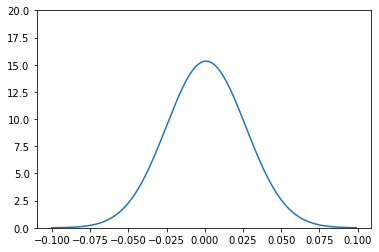

In [ ]:
plt.ylim(0,20)
plt.plot(denApp['x'],denApp['pdf'])
plt.fill_between(x=np.arange(-0.1, -0.01, 0.0001), 
                y2=0, 
                y1=norm.pdf(np.arange(-0.1, 0.05, 0.0001),mu,sigma), 
                facecolor='pink', 
                alpha=0.5)

In [ ]:
#P(Daily Return < -5%)
prob_return1 = norm.cdf(-0.05, mu, sigma)
print("The probability is ", prob_return1)

The probability is  0.025378286693035386


In [ ]:
# Probability of dropping over 40% in 1 year (220 trading days) i.e P(Annual Return <= -40%)
mu220 = 220*mu
sigma220 = 220**0.5*sigma
print(mu220, sigma220)

print('The probability of dropping over 40% in 220 days is', norm.cdf(-0.4, mu220, sigma220))

0.18507809741288603 0.38601761300767923
The probability of dropping over 40% in 220 days is 0.0648004969469265


In [ ]:
# Value at Risk (VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('With a 5% chance, daily return is worse than',round(VaR*100,2),'%')

With a 5% chance, daily return is worse than -4.2 %
